# Description
Use the Simple Moving Average Crossover (and Python) to get buy and sell signals

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

In [23]:
# Define the ticker symbol (stock type)
ticker_symbol = "MSFT"

# Create the ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
start = "2021-11-01"
end="2022-12-31"
historical_data = ticker.history(start=start,end=end)
print("Historical Data:")
print(historical_data)

# Defining the df to prevent overwriting original data
df = historical_data

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2021-11-01 00:00:00-04:00  320.631769  320.757565  315.803336  318.706207   
2021-11-02 00:00:00-04:00  319.615777  322.654129  319.315816  322.344482   
2021-11-03 00:00:00-04:00  323.089542  324.057165  319.944765  323.186310   
2021-11-04 00:00:00-04:00  322.112220  325.644040  318.841648  325.547272   
2021-11-05 00:00:00-04:00  327.550316  327.821250  323.592739  325.179626   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  231.028283  233.728875  228.904989  233.591888   
2022-12-27 00:00:00-05:00  233.562542  233.787587  230.754316  231.860001   
2022-12-28 00:00:00-05:00  231.791476  234.560569  229.130017  229.482269   
2022-12-29 00:00:00-05:00  230.578161  236.713218  230.578161  235.822800   
2022-12-30 00:00:00-05:00  233.083068  234.795403  231.5664

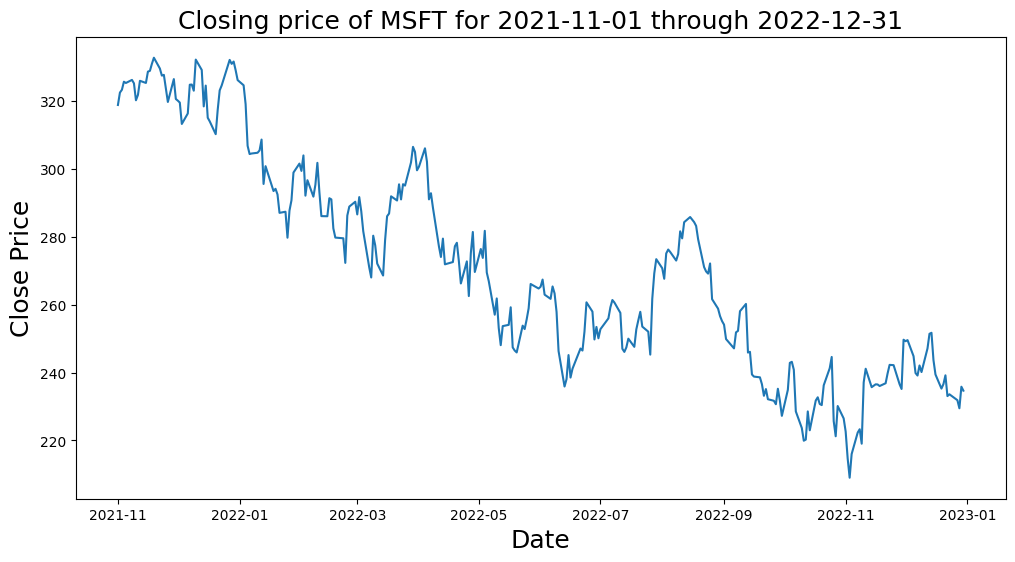

In [24]:
# Visually show the close price
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end}", fontsize=18)
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
plt.show()

In [25]:
# Create a function to calculate the Simple Moving Average (SMA)

def SMA(data, period=20, column="Close"):
    return data[column].rolling(window=period).mean()

# Creating some new columns for more data
def GenerateSMAPair(data,short,long):
    data[f"SMA{short}"] = SMA(data,period=short)
    data[f"SMA{long}"] = SMA(data,period=long)

    data[f"Signal {short}/{long}"] = np.where(data[f"SMA{short}"] > data[f"SMA{long}"], 1, 0)
    data[f"Position {short}/{long}"] = data[f"Signal {short}/{long}"].diff()
    data[f"Buy {short}/{long}"] = np.where(data[f"Position {short}/{long}"] == 1, data["Close"], np.nan)
    data[f"Sell {short}/{long}"] = np.where(data[f"Position {short}/{long}"] == -1, data["Close"], np.nan)

In [26]:
#Create two new columns to store the 20 and 50 day SMA
GenerateSMAPair(df,20,50)

In [27]:
# Get the buy and sell signals
df["Signal 20/50"] = np.where(df["SMA20"] > df["SMA50"], 1, 0)
df["Position 20/50"] = df["Signal 20/50"].diff()
df["Buy 20/50"] = np.where(df["Position 20/50"] == 1, df["Close"], np.nan)
df["Sell 20/50"] = np.where(df["Position 20/50"] == -1, df["Close"], np.nan)

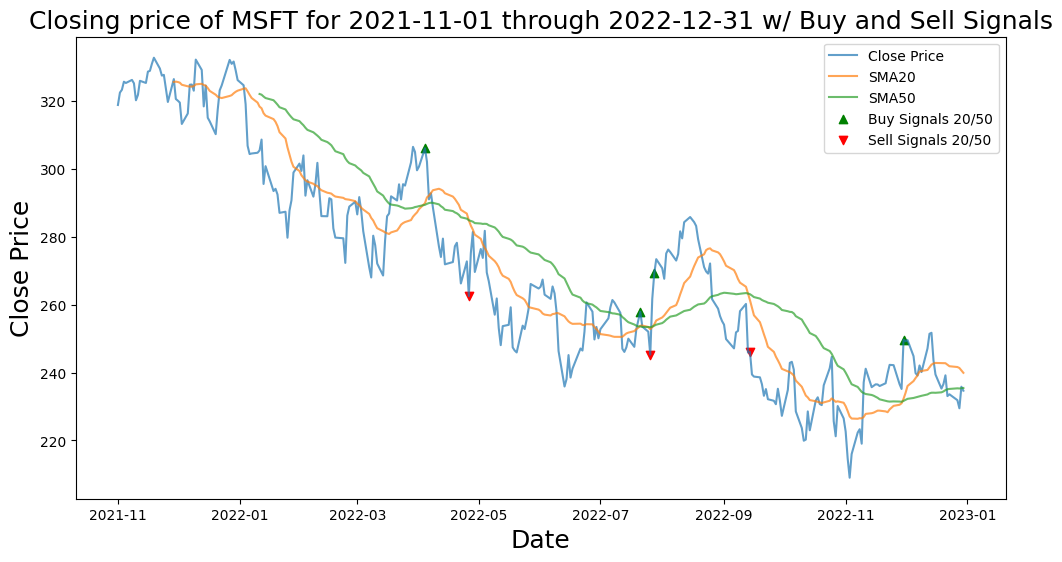

In [ ]:
# Show the close price with SMAs and Buy/Sell signals
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end} w/ Buy and Sell Signals", fontsize=18)
plt.plot(df["Close"],alpha=0.7,label="Close Price")
plt.plot(df["SMA20"],alpha=0.7,label="SMA20")
plt.plot(df["SMA50"],alpha=0.7,label="SMA50")
plt.scatter(df.index, df["Buy 20/50"],alpha=1,label="Buy Signals 20/50",marker="^",color="green")
plt.scatter(df.index, df["Sell 20/50"],alpha=1,label="Sell Signals 20/50",marker="v",color="red")

plt.legend()
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18)
#plt.savefig(f"imgs/{ticker_symbol}_{start}_{end}")
plt.show()

In [29]:
# Defining the daily returns
df["Daily Returns"] = df["Close"].pct_change()

# Display the daily returns
print(df["Daily Returns"])

# Cumulative return
df["Cumulative Returns"] = (1+df["Daily Returns"]).cumprod()
print(df["Cumulative Returns"])

Date
2021-11-01 00:00:00-04:00         NaN
2021-11-02 00:00:00-04:00    0.011416
2021-11-03 00:00:00-04:00    0.002612
2021-11-04 00:00:00-04:00    0.007305
2021-11-05 00:00:00-04:00   -0.001129
                               ...   
2022-12-23 00:00:00-05:00    0.002267
2022-12-27 00:00:00-05:00   -0.007414
2022-12-28 00:00:00-05:00   -0.010255
2022-12-29 00:00:00-05:00    0.027630
2022-12-30 00:00:00-05:00   -0.004938
Name: Daily Returns, Length: 294, dtype: float64
Date
2021-11-01 00:00:00-04:00         NaN
2021-11-02 00:00:00-04:00    1.011416
2021-11-03 00:00:00-04:00    1.014057
2021-11-04 00:00:00-04:00    1.021465
2021-11-05 00:00:00-04:00    1.020312
                               ...   
2022-12-23 00:00:00-05:00    0.732938
2022-12-27 00:00:00-05:00    0.727504
2022-12-28 00:00:00-05:00    0.720043
2022-12-29 00:00:00-05:00    0.739938
2022-12-30 00:00:00-05:00    0.736284
Name: Cumulative Returns, Length: 294, dtype: float64


In [30]:
# Generate some more SMA pairs to test
GenerateSMAPair(df,10,30)
GenerateSMAPair(df,50,100)

# Strategy Returns
df["Strategy Returns 10/30"] = df["Daily Returns"] * df["Signal 10/30"]
df["Cumulative Returns 10/30"] = (1+df["Strategy Returns 10/30"]).cumprod()

df["Strategy Returns 20/50"] = df["Daily Returns"] * df["Signal 20/50"]
df["Cumulative Returns 20/50"] = (1+df["Strategy Returns 20/50"]).cumprod()

df["Strategy Returns 50/100"] = df["Daily Returns"] * df["Signal 50/100"]
df["Cumulative Returns 50/100"] = (1+df["Strategy Returns 50/100"]).cumprod()

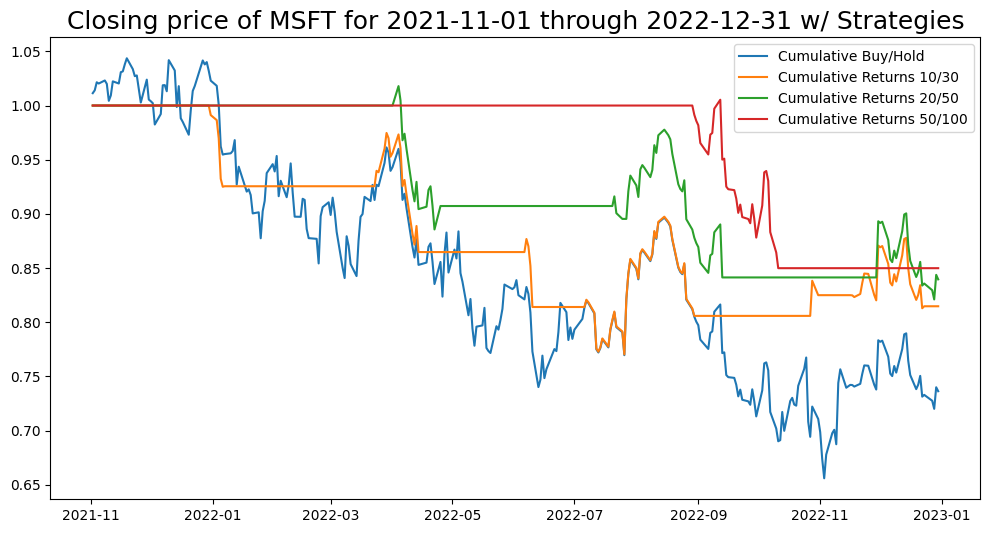

Comparison:
Buy/Hold : 0.736%
10/30 : 0.815%
20/50 : 0.840%
50/100 : 0.850%


In [ ]:
# Plotting the strategy performance
plt.figure(figsize=(12,6))
plt.title(f"Closing price of {ticker_symbol} for {start} through {end} w/ Strategies",fontsize=18)
plt.plot(df["Cumulative Returns"],label="Cumulative Buy/Hold")
plt.plot(df["Cumulative Returns 10/30"],label="Cumulative Returns 10/30")
plt.plot(df["Cumulative Returns 20/50"],label="Cumulative Returns 20/50")
plt.plot(df["Cumulative Returns 50/100"],label="Cumulative Returns 50/100")
plt.legend()
plt.savefig(f"imgs/EquityCurve {ticker_symbol}_{start}_{end}")
plt.show()

# Numerical output
print("Comparison:")
print(f"Buy/Hold : {df["Cumulative Returns"].iloc[-1]:.3f}%")
print(f"10/30 : {df["Cumulative Returns 10/30"].iloc[-1]:.3f}%")
print(f"20/50 : {df["Cumulative Returns 20/50"].iloc[-1]:.3f}%")
print(f"50/100 : {df["Cumulative Returns 50/100"].iloc[-1]:.3f}%")

In [ ]:
# Volatility of returns, sqrt(252) accounts for ~252 trading days a year
volatility = df["Daily Returns"].std() * np.sqrt(252)
volatility_10_30 = df["Strategy Returns 10/30"].std() * np.sqrt(252)
volatility_20_50 = df["Strategy Returns 20/50"].std() * np.sqrt(252)
volatility_50_100 = df["Strategy Returns 50/100"].std() * np.sqrt(252)

print("Comparing the volatility:")
print(f"Buy/Hold : {volatility:.3f}")
print(f"10/30 : {volatility_10_30:.3f}")
print(f"20/50 : {volatility_20_50:.3f}")
print(f"50/100 : {volatility_50_100:.3f}")

Comparing the volatility:
Buy/Hold : 0.338
10/30 : 0.177
20/50 : 0.152
50/100 : 0.103
